# **Mechine Learning**

### Supervised Learning : 입력과 정답(레이블)이 주어진 데이터를 학습하여 새로운 입력에 대한 출력을 예측합니다.
### Unsupervised Learning : 정답(레이블) 없이 데이터를 학습해 데이터의 패턴이나 구조를 찾습니다.
### Reinforment Learning : 에이전트가 환경과 상호작용하며 보상을 최대화하는 최적의 행동을 학습합니다.

- ### Supervised Learning

- 문제와 정답이 다 갖춘 데이터를 가지고 학습(label이 존재)

- Classification
1. Binary Classification
    - 두 가지를 분류하는 알고리즘
2. Multi-Class Classification
    - 두 가지 이상 feature를 분류, 지폐의 단위 구분 등

- Regression
  - 연속적인 값을 예측하는 것

- ### Unsupervised Learning

- 정답이 없는 데이터로부터 패턴이나 형태 추출해서 새로운 데이터 예측

- Clustering
  데이터의 특징을 활용해서 다양한 군집으로 나누고, 새로운 데이터가 어떤 그륩에 속하는지 예측

- ### Reinforment Learning

- 자신이 한 행동에 보상을 받으며 학습(알파고), 데이터가 있어도 정답 존재하지 않음

---

- ### **Classification**

In [73]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [25]:
# 물고기 길이와 무게 -> 물고기 종류 예측

import numpy as np

length = bream_length+smelt_length
weight = bream_weight+smelt_weight

fish_data = [[i, j] for i, j in zip(length, weight)]

In [28]:
fish_target = [1]*35 + [0]*14

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [30]:
kn.score(fish_data, fish_target)

1.0

In [32]:
kn.predict([[30, 100]]) # class 0으로 예측

array([0])

---

- 평가할 데이터 셋(Test set)이 필요함

In [33]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                    10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                    7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [35]:
fish_data = [[i, j] for i, j in zip(fish_length, fish_weight)]

In [37]:
fish_input = fish_data[:35] # -> 이렇게 하면 샘플링 편향 문제 발생함. 앞에 도미만 빠지고 빙어만 남음.
# 샘플을 골고루 섞어야함

In [38]:
# numpy shuffle, arange 이용해서 샘플 골고루 섞을 수 있음

In [52]:
import numpy as np
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [53]:
# index 골고루 섞여서 -> numpy 배열에 넣으면 됨. 기존 데이터를 numpy array 형태로 변환

input_arr = np.array(fish_data)
fish_target = [1]*35 + [0]*14
target_arr = np.array(fish_target)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [54]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [55]:
kn.score(train_input, train_target)

1.0

In [56]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

kn.score(test_input, test_target)

1.0

---

- 잘못 예측하는 문제 발생 -> train_test_split

In [57]:
# np.column_stack() , np.concatenate() 
# 열 단위로 묶는 것, 그냥 한 row로 합치는 것

In [58]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                    10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                    7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [59]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) # tuple 형태로 묶어야함

In [60]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [62]:
# numpy zeros, ones, concatenate 함수

fish_target = np.concatenate((np.zeros(35), np.ones(14))) # tuple 형태로 넘겨줘야함

In [64]:
from sklearn.model_selection import train_test_split # 25%가 기본
train_input, train_target, test_input, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [67]:
# stratify 인자 -> 샘플링 편향 방지. 기존 데이터의 비율대로 train_set, test_set 나누어줌 . target_data 기준!

In [68]:
from sklearn.model_selection import train_test_split # 25%가 기본
train_input, train_target, test_input, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [69]:
distances, indexs = kn.kneighbors([[30, 100]])

In [71]:
# 기본적으로 n_neighbors=5 이기 때문에 5개 점 출력
print(distances)
print(indexs)

[[81.8204131  88.37035702 89.43064352 89.58615965 91.82178391]]
[[ 2  1 18  3 17]]


In [72]:
# 데이터 전처리 (표준화 , z-score)
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input-mean) / std

---

- ### **Regression**

In [74]:
# 농어의 길이를 가지고 농어의 무게를 예측하는 회귀 알고리즘
# KNeighborsRegressor : 예측하려는 샘플에 가장 가까운 샘플 k개 선택하고, 그 샘플의 평균을 구해서 예측

In [82]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [83]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [86]:
# 2차원 배열로 무조건 바꿔야함 1차원 -> 2차원
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [88]:
knr.score(train_input, train_target)

0.9698823289099254

In [89]:
knr.score(test_input, test_target)

0.992809406101064

In [90]:
# -> overfitting(과적합) 문제 발생

### R² (결정계수) 공식과 설명

**R² 공식**:  
$\
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
\$ 

---

**RSS (Residual Sum of Squares, 잔차 제곱합)**  
실제값과 예측값의 차이를 제곱해서 더한 값입니다.  
$\[
\text{RSS} = \sum (y_i - \hat{y}_i)^2
\$]  

- $( y_i)$: 실제값  
- $(\hat{y}_i)$: 예측값  

---

**TSS (Total Sum of Squares, 총 제곱합)**  
실제값과 평균값의 차이를 제곱해서 더한 값입니다.  
\$[
\text{TSS} = \sum (y_i - \bar{y})^2
\]$  

- $(y_i)$: 실제값  
- $(\bar{y})$: 실제값의 평균  

---

### R² 점수 해석  
- $(R^2 = 1)$: 완벽하게 예측한 경우  
- $(R^2 = 0)$: 모델이 평균값으로만 예측한 경우  
- $(R^2 < 0)$: 예측이 실제값보다 더 나쁜 경우  


- 절댓값 오차 (mean_absolute_error) : 타킷과 예측값의 오차의 절댓값 다 더해서 평균

In [92]:
from sklearn.metrics import mean_absolute_error
train_pred = knr.predict(train_input)
mae = mean_absolute_error(train_target, train_pred)
mae

35.76190476190476

In [93]:
# underfitting 방지하기 위해 k 값 3개로 줄임

knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [94]:
knr.score(train_input, train_target)

0.9804899950518966

In [95]:
knr.score(test_input, test_target)

0.9746459963987609

- kNeighborsRegressor를 사용하면 큰 농어(이상치) 값이 들어와도 근처 3점에 대한 예측값을 리턴하기 때문에 input 값이 아무리 커져도 예측값은 일정함.

- **Linear Regression** : 선형 회귀(직선), 연속적인 값 예측

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [97]:
lr.score(train_input, train_target)

0.9398463339976041

In [98]:
lr.score(test_input, test_target)

0.8247503123313559

- ### overfitting 문제 발생, 농어의 무게가 음수가 된다.(작은 length에서)

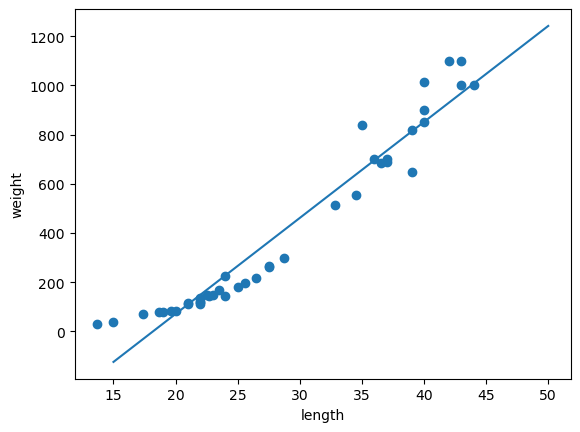

In [103]:
import matplotlib.pyplot as plt
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

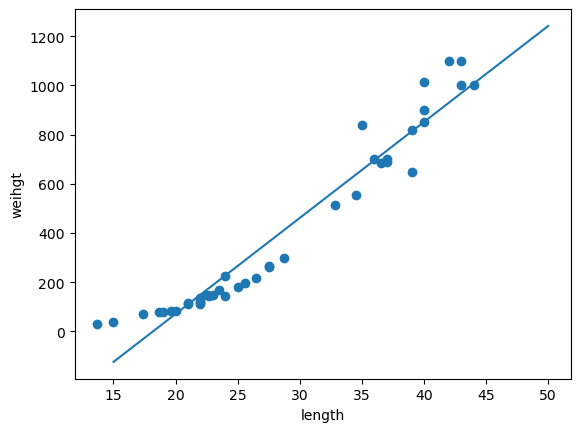

In [102]:
import matplotlib.pyplot as plt

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weihgt')
plt.show()

- **다항 회귀(Polynomial Regression)** : 다항식을 이용한 선형 회귀

In [106]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [107]:
lr.fit(train_poly, train_target)

LinearRegression()

In [108]:
lr.score(train_poly, train_target)

0.9706807451768623

In [111]:
lr.score(test_poly, test_target) # underfitting

0.9775935108325121

In [112]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [114]:
point = np.arange(15, 50)

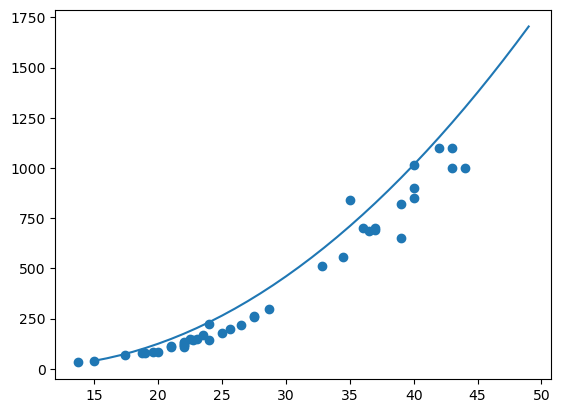

In [115]:
plt.plot(point, 1.101433*point**2-21.557924*point+116.05021)

plt.scatter(train_input, train_target)
plt.show()

과소적합이 조금 남아있지만, 음수가 나오지 않고 예측 경향이 훈련 세트에 잘 들어맞음

- **다중 회귀(Multiple Regression)** : 여러 개의 특성(2개 이상의 feature)을 사용한 선형 회귀, 그릴 수 없음(3차원 이상)

- feature engineering : 새로운 feature 만드는 방법. 추가하거나 기존 feature를 가공해서 새로운 것 만들 수 있다.(종속변수에 영향을 많이 주는 경우에)

In [117]:
import pandas as pd
df = pd.read_csv("perch_csv_data.csv")
df.head(n=5)

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [120]:
perch_full = df.to_numpy() # 2차원 배열로 만들기

In [119]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [121]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [122]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [123]:
# transformer : feature 만들거나, 전처리(preprocessing)
# polynomialFeatures : feature 제곱한 항, feature끼리 서로 곱한 항 추가하는 라이브러리

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [125]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [127]:
poly.get_feature_names_out() # 최대 3개까지 됨

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [131]:
lr.score(train_poly, train_target)

0.9903183436982126

In [132]:
lr.score(test_poly, test_target)

0.9714559911594143

In [133]:
# 고차항의 특성 추가 (degree=5, 5차항 추가)

In [135]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [136]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [137]:
lr.score(train_poly, train_target)

0.999999999998714

In [138]:
lr.score(test_poly, test_target)

-144.4066764700865

-> **훈련 세트에 너무 과대적합(overfitting)됨**

---

### - **규제(regularization) L1, L2** : 가중치 값을 작게 하는 것

- 선형 회귀 모델에 규제를 그대로 적용할 때 계수(기울기, 가중치) 값의 크기가 서로 많이 다르면 안됨.
- 특성 값의 범위가 서로 다르면 그에 따라 계산되는 가중치의 크기도 달라질 수 있습니다.
- x₁: 범위가 0~1 (작은 값)
- x₂: 범위가 1,000~10,000 (큰 값)
- 스케일 정규화 과정이 필요함

In [139]:
# 정규화 과정
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- L1 Regularization (Lasso) : 계수(기울기, 가중치)의 절댓값을 기준으로 규제 적용. 0으로 만들 수 있음 : feature selection

In [140]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_poly, train_target)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [141]:
lasso.score(train_poly, train_target)

0.9907713826366444

In [144]:
lasso.score(test_poly, test_target) # 과소적합, 과대적합 문제 해결함.

0.9829845191292339

- 적절한 alpha값 찾기
- alpha 값이 커지면 규제가 강해지고, 작아지면 규제가 약해진다.

In [154]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # 최적의 계수(가중치)를 찾기 위해 반복적인 계산 수행함.
    lasso.fit(train_poly, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
print(train_score)
print(test_score)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.945e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+04, tolerance: 

[-1.8050333851088949, -1.78330418719895, -1.6321285118228355, -1.5238210879226992, -1.5567159246303026, -1.3374541802963358]
[-1.6350468066642434, -1.6079675578930317, -1.4199156415189003, -1.286633339152632, -1.3195410851344795, -1.0972904224056603]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.155e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


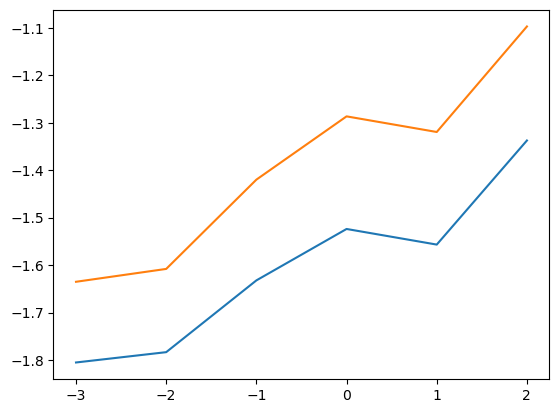

In [155]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [151]:
np.sum(lasso.coef_ ==0) # 기울기(가중치)를 0으로 만들어버릴 수 있음. 중요하지 않은 feature를 고려 안한다는 뜻.

21

- L2 Regularization (Ridge) : 계수(기울기, 가중치)의 제곱을 기준으로 규제 적용. 0에 근접하게 만들 수 있음

In [156]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [157]:
ridge.score(train_scaled, train_target)

0.9896101671037343

In [158]:
ridge.score(test_scaled, test_target)

0.9790693977615391

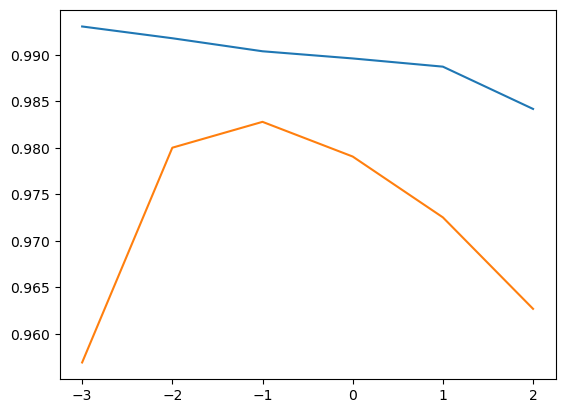

In [159]:
train_score = list()
test_score = list()

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, max_iter=10000) # Ridge 모델은 max_iter 없음
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

-> -1이 즉 0.1이 가장 적합한 alpha 값(test, train score 차이가 가장 적은 곳)

---

### 럭키백 이벤트

In [161]:
fish = pd.read_csv("fish_csv_data.csv")
fish.head(n=5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [163]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [164]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [176]:
fish['Species'].nunique()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [169]:
fish_input = fish.drop(['Species'], axis=1).to_numpy

In [171]:
fish_target = fish['Species'].to_numpy()

In [177]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [178]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [179]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(train_scaled, train_target)

0.7983193277310925

- **Multi-class Classification(다중 분류)** : target data(종속변수)에 2개 이상의 클래스가 포함
- fish에 7개의 생선이 있음
- 타깃값을 숫자로 바꾸어 입력할 수 있음, 문자열도 가능
- 사이킷런 내부에서는 알파벳순, kn에서 정렬된 타깃값은 classes_ attribute에 있음

In [180]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [182]:
# predict_proba : 클래스 별 예측 확률값 반환
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.2, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ]])

In [183]:
distances, indexs = kn.kneighbors(test_scaled[3:4])
train_target[indexs]

array([['Roach', 'Perch', 'Perch', 'Perch', 'Perch']], dtype=object)

In [184]:
indexs

array([[104, 115, 106,  42,  23]], dtype=int64)

In [185]:
# 확률에 대한 표현의 개수 적음(1/3, 2/3, 3/3)

- **Logistic Regression(로지스틱 회귀)** : 분류 모델, 선형 방정식 학습(이진 분류)
- 시그모이드 함수에 넣어서 0.5 기준으로 분류

In [187]:
# boolean indexing (numpy) : True인 것만 골라서 출력
bream_smelt_indexs = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [188]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [189]:
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [190]:
# Z값(양수면 확률이 0.5보다 크고, 음수면 작음) 계산 : decision function()으로 출력
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

In [191]:
from scipy.special import expit
expit(decisions)

array([0.00239993, 0.97262675, 0.00513614, 0.01414953, 0.00232581])

---

- **로지스틱 회귀로 다중 분류 수행**

In [192]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [193]:
lr.score(train_scaled, train_target)

0.9327731092436975

In [194]:
lr.score(test_scaled, test_target)

0.925

In [195]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [196]:
# 다중 분류는 softmax 함수를 사용해서 Z값을 확률로 변환
# 가장 큰 Z값이 선택됨

In [198]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals=4)

array([[ -6.5072,   1.039 ,   5.1682,  -2.7573,   3.3366,   0.3463,
         -0.6255],
       [-10.879 ,   1.9441,   4.776 ,  -2.4231,   2.9875,   7.8417,
         -4.2472],
       [ -4.3381,  -6.2369,   3.1675,   6.4809,   2.3641,   2.4343,
         -3.8718],
       [ -0.6914,   0.4463,   2.6429,  -1.2146,   3.2612,  -5.7014,
          1.257 ],
       [ -6.4014,  -1.9914,   5.8153,  -0.1346,   3.4991,  -0.0875,
         -0.6994]])

In [201]:
from scipy.special import softmax
np.round(softmax(decision, axis=1), decimals=3) # 확률처럼 나옴(다 합하면 1)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

---

- 훈련 데이터 조금씩 훈련(새로운 데이터 추가될 때 기존 데이터 버림)
- 점진적 학습, 온라인 학습이라고 함
- 데이터 버릴 때 중요한 데이터 포함되면 안됨

### **Stochasitc Gradient Descent(SGD, 확률적 경사 하강법)** : 랜덤하게 하나 샘플 골라 만족할 때까지 계속 내려감
- minibatch gradient descent : 여러 개 샘플로 경사 하강법 수행
- bath gradient descent : 모든 데이터로 경사 하강법 수행(안정적, 컴퓨터 자원 많이 소모)

- loss function(손실 함수) : 오차를 측정하는 함수. minimum loss를 향해 가는 것이 경사 하강법
  - 분류 : logistic loss funtcion, binary cross-entropy loss function(이진분류) : 클래스 1일 때 -log(확률) / 0일 때 -log(1-확률)로 계산 / cross-entropy loss function(다중 분류)
  - 회귀 : RMSE, MSE .. 

In [202]:
fish = pd.read_csv("fish_csv_data.csv")

In [203]:
fish_input = fish.drop(['Species'], axis=1).to_numpy()

In [204]:
fish_target = fish.Species.to_numpy()

In [205]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [206]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [207]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(max_iter=10, loss="log_loss", random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [209]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 비교적 낮은 점수

0.773109243697479
0.775


In [210]:
# 점진적 학습(온라인 학습)이 가능함 : partial_fit
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [212]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 점수 개선됨

0.8151260504201681
0.85


In [214]:
# epoch 횟수 적당히 조절해야함 : 너무 높으면 overfitting 

# tol -> 지정한 epoch 수 다 채울 때까지 돌아감
sc = SGDClassifier(max_iter = 100, tol=None, loss="log_loss", random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 나은 성능, overfitting 방지

0.957983193277311
0.925


---


**패션 럭키백 이벤트** : 패션 MNIST 데이터셋

In [216]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [217]:
train_input.shape

(60000, 28, 28)

In [219]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [220]:
# 샘플이 6000개나 되기 때문에, batch gradient descent 보다 stochastic gradient descent 방식이 좋음
# feature 마다 값의 범위가 다르면 안됨 -> 전처리 해주어야함

In [223]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) # 2차원 데이터를 1차원으로 바꿔주어야함

In [224]:
train_scaled.shape

(60000, 784)

- **Cross Validation(교차 검증)** : 모델을 반복 학습 시킴으로써 모델의 신뢰도 높이는 방법, 분리한 데이터를 교차하여 모델 검증
- K-Fold Cross validate : 전체 데이터를 5 Folds으로 분리. 한 조각을 평가 데이터, 나머지 조각을 훈련 데이터로 활용해 학습 진행

In [225]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = "log_loss", max_iter=5,random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
scores

{'fit_time': array([14.66552448, 14.75407338, 14.64599299, 13.96686625, 13.79458666]),
 'score_time': array([0.04170752, 0.07256341, 0.04120135, 0.07211661, 0.11178732]),
 'test_score': array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])}

In [226]:
scores

{'fit_time': array([14.66552448, 14.75407338, 14.64599299, 13.96686625, 13.79458666]),
 'score_time': array([0.04170752, 0.07256341, 0.04120135, 0.07211661, 0.11178732]),
 'test_score': array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])}

---

### **인공 신경망(Artificial Neural Network, ANN)**

- 워런 매컬러와 월터 피츠(매컬러-피츠 뉴런)가 제안한 뉴런 모델
- 딥러닝 == 인공신경망
- input layer / hidden layer / output layer

In [227]:
# keras : 프랑스와 숄레가 만든 딥러닝 라이브러리
# 교차 검증을 잘 사용하지 않음

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [229]:
# dense layer(hidden layer) 만들기 (10개 층)
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784,))

In [230]:
model = keras.Sequential([dense])

In [231]:
train_target

array([7, 3, 5, ..., 6, 6, 1], dtype=uint8)

In [232]:
# adam optimizer : 각 가중치에 대해 적응적 학습률을 사용하여 더 빠르고 안정적으로 수렴합니다.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [233]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7296 - loss: 0.8146
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8375 - loss: 0.4798
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.8483 - loss: 0.4482
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8556 - loss: 0.4252   
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8554 - loss: 0.4183
